In [1]:
import pbjam as pb
from pbjam.jar import session
import matplotlib.pyplot as plt
import numpy as np
import lightkurve as lk 
import sys
import astropy.units as units
import pandas as pd
import lightkurve as lk
import importlib

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
kic = '4448777'
numax = [220.0, 3.0]
dnu = [16.97, 0.05]
teff = [4750, 100]
bp_rp = [1.34, 0.1]

In [3]:
lc = lk.search_lightcurvefile(kic, quarter=1).download().PDCSAP_FLUX.normalize().flatten(window_length=401)
for q in range(2,17):
    lc = lc.append(lk.search_lightcurvefile(kic, quarter=q).download().PDCSAP_FLUX.normalize().flatten(window_length=401))
lc = lc.remove_outliers(4)
pg = lc.to_periodogram(normalization='psd', minimum_frequency=150.0).flatten()

In [4]:
star = pb.jar.star(kic, pg.frequency.value, pg.power.value, 
                   numax, dnu, teff, bp_rp, 
                   store_chains=True, 
                   nthreads=4)

In [5]:
star.run_epsilon()

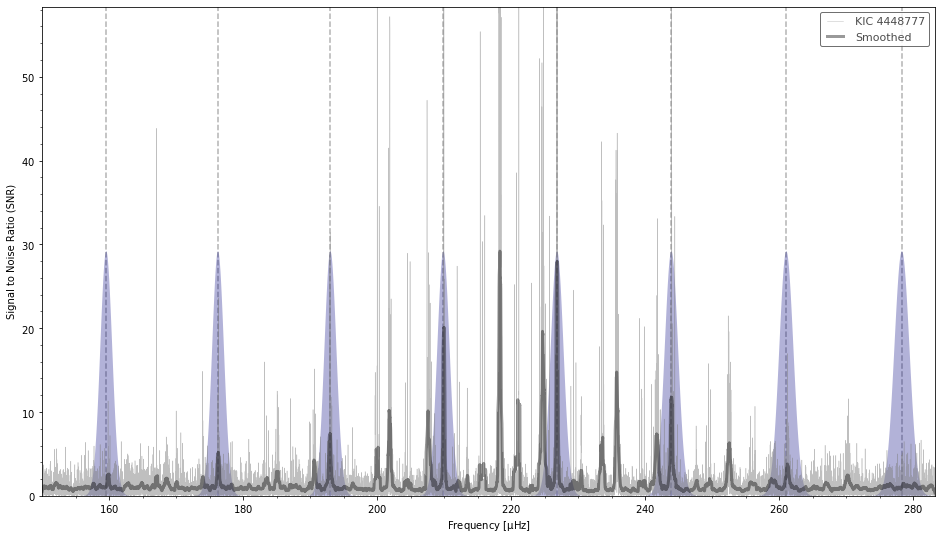

In [6]:
star.epsilon.plot(pg)

In [7]:
star.run_asy_peakbag(norders=7)

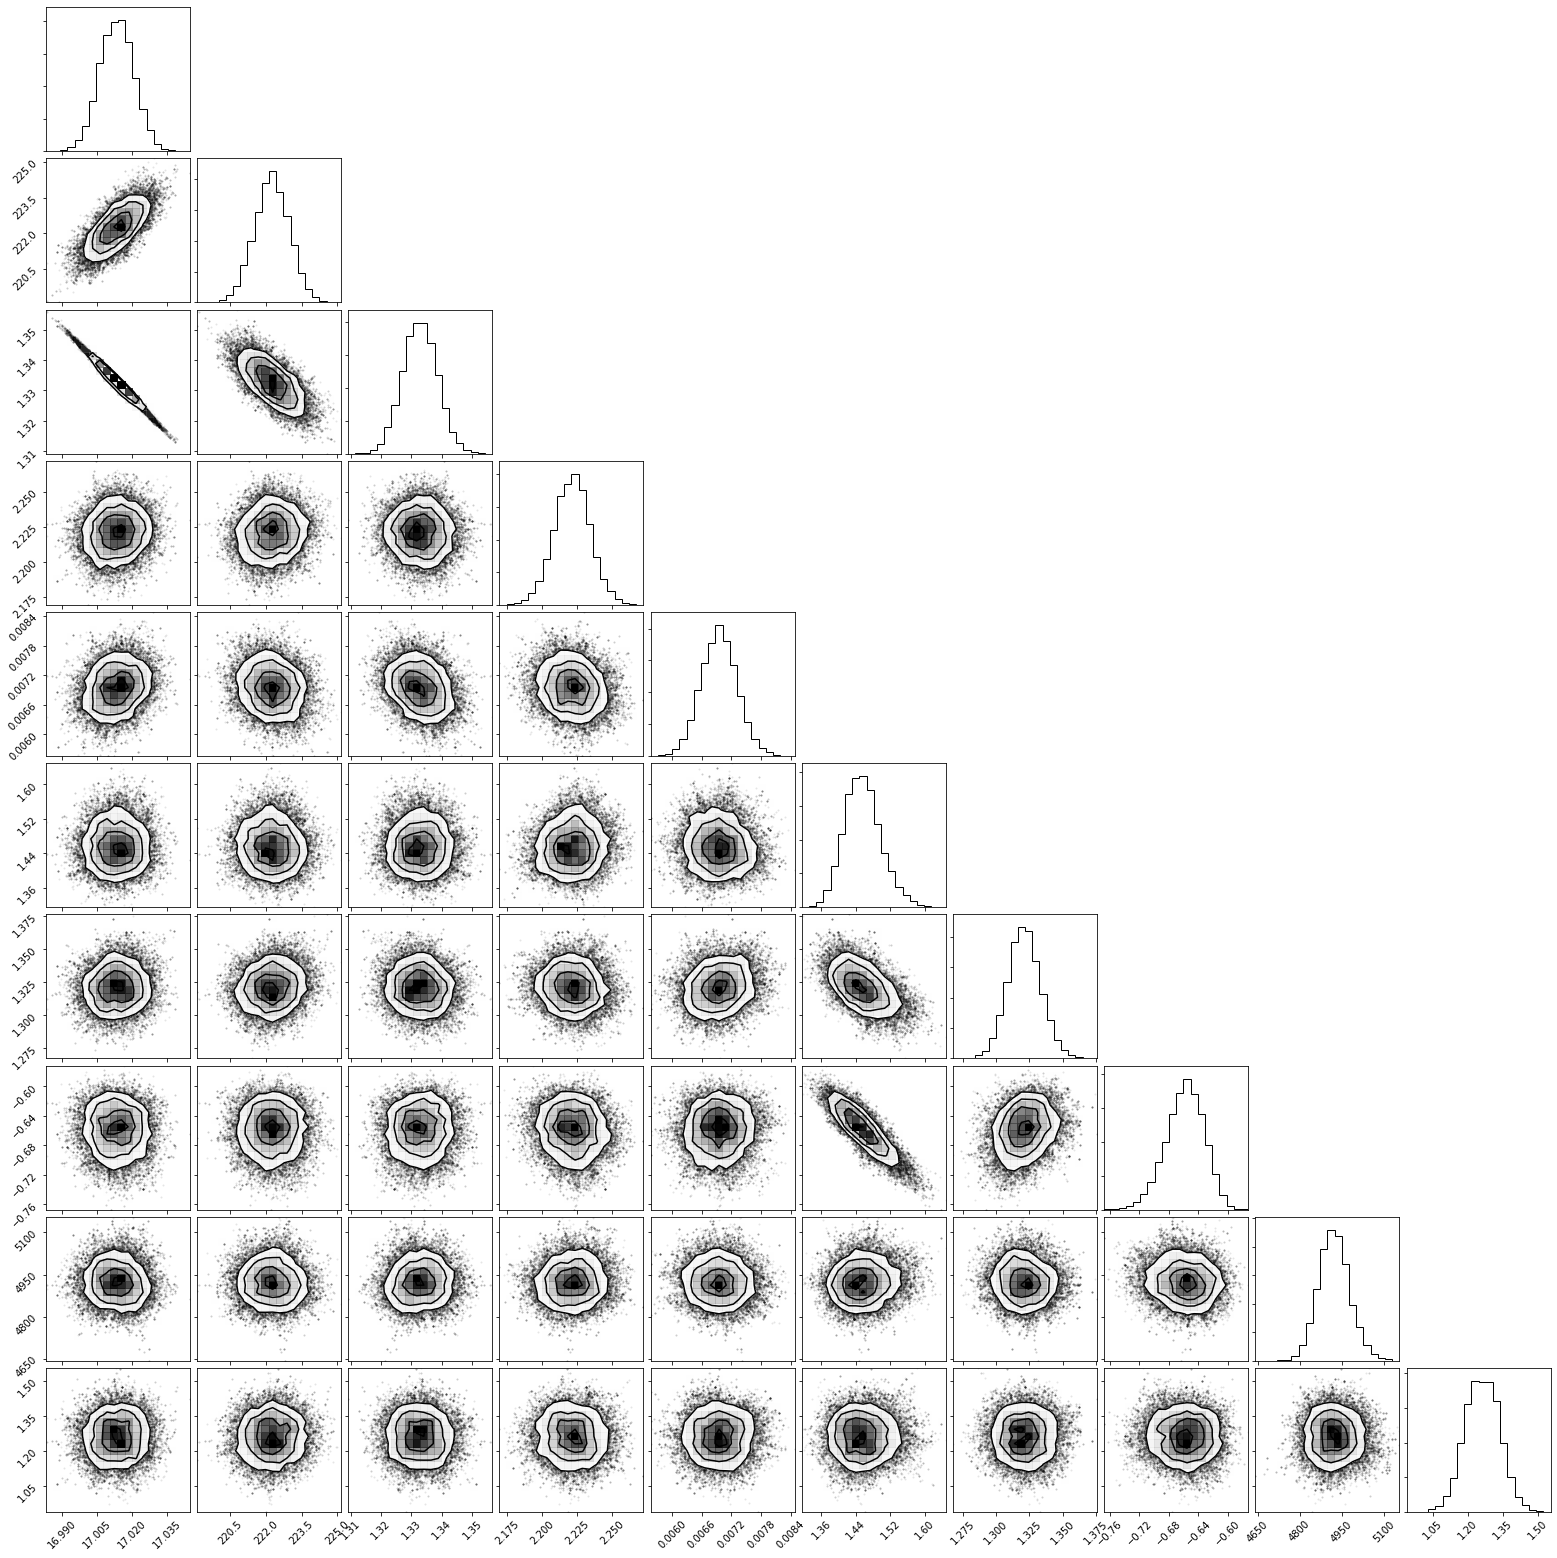

In [8]:
import corner
corner.corner(star.asy_fit.flatchain);

In [9]:
import pbjam
star.peakbag = pbjam.peakbag(star.f, star.s, star.asy_result)

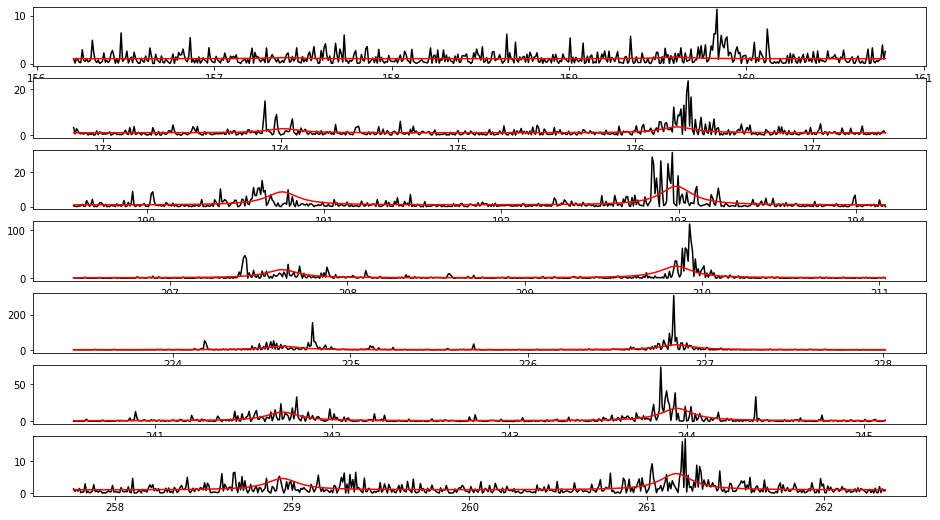

In [10]:
star.peakbag.plot_start_model()

In [11]:
star.run_peakbag()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [back, height2, height0, width2, width0, l2, l0]
Sampling 4 chains: 100%|██████████| 8000/8000 [05:43<00:00, 15.22draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6604342679310451, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.6275153738826315, but should be close to 0.8. Try to increase the number of tuning steps.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6953678971381916, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.


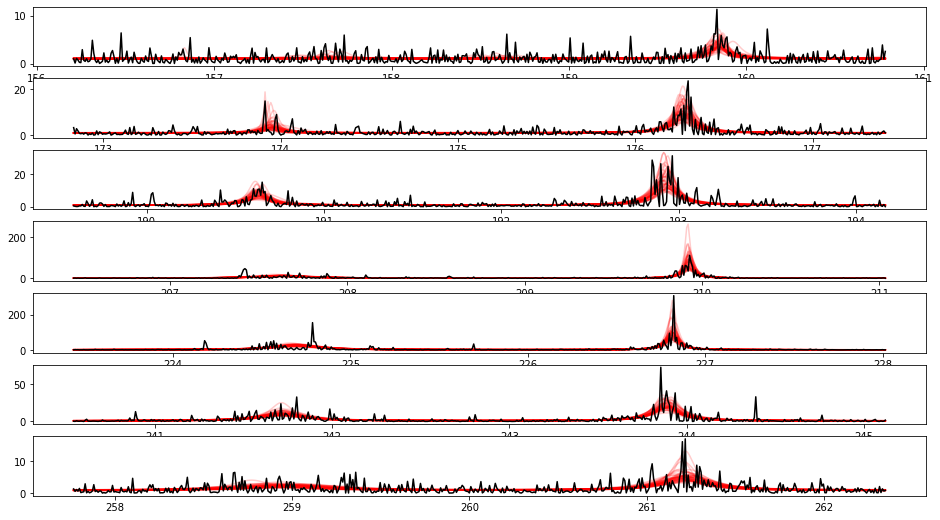

In [12]:
star.peakbag.plot_fit(thin=10)